# Handling missing values

In [12]:
import pandas as pd
import seaborn as sns

# Handling missing values

In [14]:
data = sns.load_dataset('titanic')
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Manipulating missing values

In [16]:
def count_missing_values(data, drop_zeros=True):
    missing_values=pd.DataFrame(data=data.isnull().sum(), columns=["Number of missing values"])
    missing_values["Percent"]=round(100*missing_values["Number of missing values"]/data.shape[0],2)
    missing_values.sort_values(by=["Number of missing values"], ascending=False, inplace=True)
    if drop_zeros:
      missing_values=missing_values[missing_values["Percent"]>0]
    return missing_values

In [19]:
count_missing_values(data)

,Number of missing values,Percent
deck,688,77.22
age,177,19.87
embarked,2,0.22
embark_town,2,0.22


### Backfill imputation

In [8]:
#data.fillna(0, inplace=True)

#All missing values are filled using nearest rows

filling_method='bfill' #ALl the methods: ‘backfill’, ‘bfill’, ‘pad’, ‘ffill’

backfillImputedData=df_in_nums.fillna(method=filling_method, axis=0)

### KNN imputation

In [8]:
from sklearn.impute import KNNImputer

def KNN_imputation(DataFrame, n_neighbors):
    df_KNN_num = DataFrame.copy()
    imputer_num = KNNImputer(n_neighbors = n_neighbors, weights="distance")
    df_filled_num = imputer_num.fit_transform(df_KNN_num)
    df_KNN_num = pd.DataFrame(data=df_filled_num, columns=DataFrame.columns)
    df_KNN_num = df_KNN_num.astype("int64")
    return df_KNN_num

## Calculating the best N for KNN

In [9]:
range_imp = [1,10,20,50,100,1000]
imputations = [KNN_imputation(df_in_nums, n) for n in range_imp]

In [10]:
df_size = df_in_nums.size
KNN_errors = [1-(df_in_nums.values == dataset.values).sum()/df_size for dataset in imputations]
index_min = np.argmin(KNN_errors)

Text(0.5, 1.0, 'Imputation error vs Number of neighbours used in KNN')

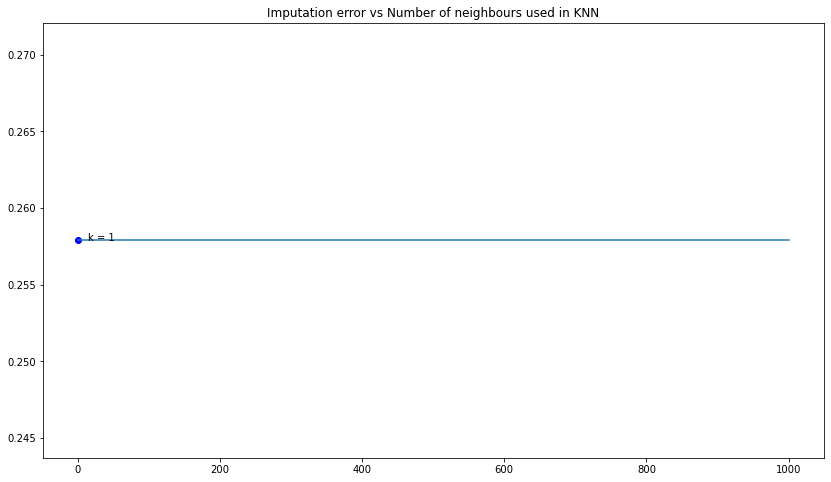

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.plot(range_imp,KNN_errors)
plt.annotate("k = " + str(range_imp[index_min]), (range_imp[index_min], KNN_errors[index_min]), textcoords="offset points", xytext=(10,0))
plt.scatter(range_imp[index_min], KNN_errors[index_min], color="blue")
plt.title("Imputation error vs Number of neighbours used in KNN") 